In [1]:
%load_ext autoreload
%autoreload 2


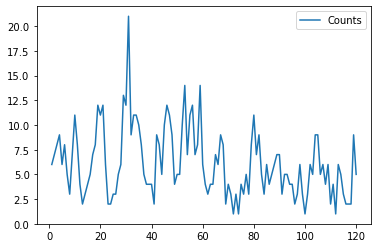

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv("trees.csv",index_col=[0])
df.plot()
plt.show()

In [79]:

n=len(df.values)
#Initialise order for INARMA(p,q)
q_init=1
p_init=2

#Initialise alpha_1,...,alpha_p,beta_1,...,beta_q,lambda
alpha=np.repeat(1/(p_init+1),p_init)
beta=np.repeat(1/(q_init+1),q_init)
lam=1

#Initalise augmented data
y=np.zeros([n,p_init])
v=np.zeros([n,q_init])
z= df.values
x_data=df.values

init_order=[p_init,q_init]
init_augs=[y,v,z]
init_pars=[alpha,beta,lam]
#Set maximum order
p_max=4
q_max=4
order_max=[p_max,q_max]
N_reps=50

In [16]:
from INARMA_RJMCMC import inarma_rjmcmc


In [113]:
order_count, alphas,betas,lams =inarma_rjmcmc(x_data,init_augs,init_pars,init_order,order_max,N_reps)

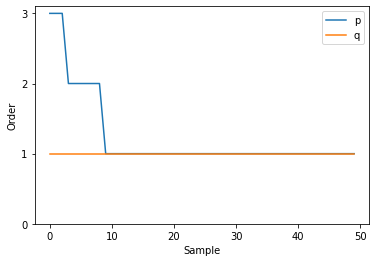

In [109]:
# plot order
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(order_count)
ax.set(title='', ylabel='Order', xlabel='Sample')
ax.legend(labels = ["p","q"])
ax.yaxis.set(ticks=range(0,max(p_max,q_max)))
plt.show()

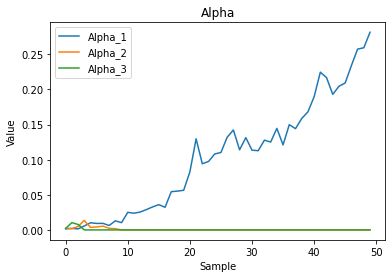

In [110]:

# plot alpha
max_p = max(order_count[0,])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas)
ax.set(title='Alpha', ylabel='Value', xlabel='Sample')

alpha_lab=[]
for i in range(0,max_p): alpha_lab.append("Alpha_%i" %(i+1) )
ax.legend(loc = "best",labels = alpha_lab)
plt.show()

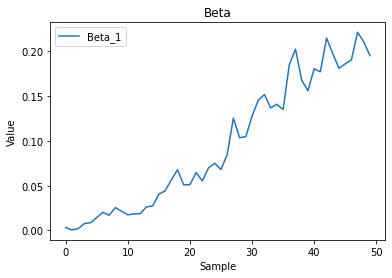

In [111]:
# plot beta
max_q = max(order_count[1,])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(betas)
ax.set(title='Beta', ylabel='Value', xlabel='Sample')

beta_lab=[]
for i in range(0,max_p): beta_lab.append("Beta_%i" %(i+1) )
ax.legend(loc = "best",labels = beta_lab)
plt.show()

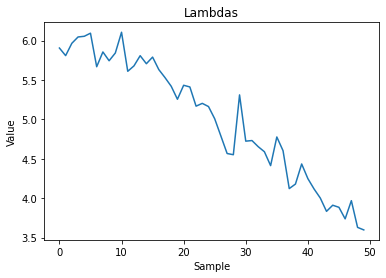

In [112]:
# plot lambda
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lams)
ax.set(title='Lambdas', ylabel='Value', xlabel='Sample')
plt.show()

In [251]:
from INARMA_backend import *

In [80]:

n=len(x_data)
p_max = order_max[0]
q_max = order_max[1]
rmax=max(p_max,q_max)+2

order_count= np.zeros([N_reps,2])
pars_sample= []

p = init_order[0]
q=init_order[1]
y = init_augs[0]
v = init_augs[1]
z = init_augs[2]
alphas = init_pars[0]
betas = init_pars[1]
lam = init_pars[2]
from scipy.stats import binom
from INARMA_backend import *

In [103]:
    for iter in range(0,1):
   

     #P-order step (ar->ar)
        if p>1:
        #Does p go up or down?
            if not p == p_max:
                order=np.random.choice([-1,1])
            else:
                order = -1

            if order==1 :
                p_new, alphas, y = p_up(x_data,y,alphas,p,rmax)
            elif order== -1 :
                p_new, alphas, y = p_down(x_data,y,alphas,p,rmax)

        elif p ==1:
                #Does p go up or down?
            while True:
                order=np.random.choice([-1,1])
                if not (order == -1 and q == 0):
                    break
            if order== -1:
                p_new,alphas, lam,y = arma_to_ma(x_data, y,v,z, alphas, betas, lam, p, q,rmax)

            if order== 1 and (not p == p_max) :
                p_new, alphas, y = p_up(x_data,y,alphas,p,rmax)
        elif p == 0 and (not q ==0) and (not p == p_max):

                p_new,alphas,y,v,z = ma_to_arma(x_data, y,v,z, alphas, betas, lam, p, q,rmax)
                
        p=p_new
       ##Q order step

        ## Gibbs-sampler for parameters

        theta=sim_pars_ARMA(x_data,y,v,z,p,q)
       

(array([3.35425512e-03, 1.91027285e-06, 5.09787026e-04]),
 array([0.00371379]),
 6.065937015951016)